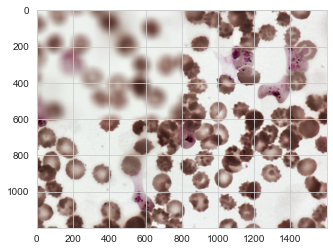

True

In [50]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
def gaussian_mask_generate(I, k, grey_area, ksize=(23, 23), std=13):
    blurred_img = cv2.GaussianBlur(I, ksize, std)
    shape1=I.shape[0]//(2**k)
    shape2=I.shape[1]//(2**k)
    mask = np.zeros(I.shape, dtype=np.uint8)
    for i in range(len(grey_area)):
        row=grey_area[i]//(2**k)
        col=grey_area[i]-row*(2**k)
        if col==0:
            col=2**k
        col-=1
        startr=row*shape1;endr=(row+1)*shape1
        startc=col*shape2;endc=(col+1)*shape2
        mask[startr:endr,startc:endc,:]=[255, 255, 255]
    out = np.where(mask!=np.array([255, 255, 255]), I, blurred_img)
    return out

if __name__ == "__main__":
    k=1     ### 2^(2*k)
    grey_area = [1]  ###block number
    I=cv2.imread('./a9159b11-ba49-4885-902e-00c8d5095b98.png')   ###path
    I_m=gaussian_mask_generate(I,k,grey_area, ksize=(55, 55), std=55)
    plt.imshow(I_m)
    plt.show()
    cv2.imwrite("./a9159b11-ba49-4885-902e-00c8d5095b98_mask.png", I_m)